<a href="https://colab.research.google.com/github/Rishapriakanth/Machine-learning-analysis/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [4]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

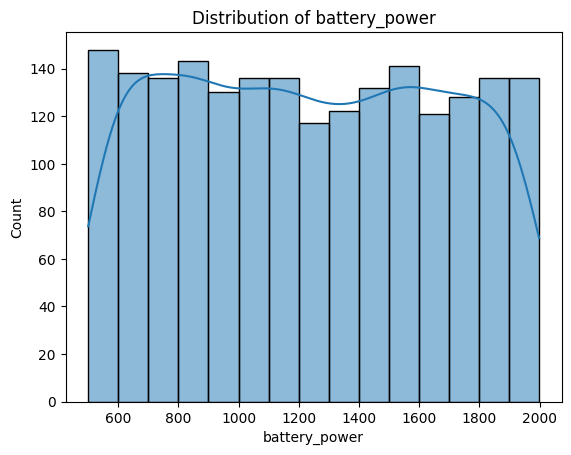

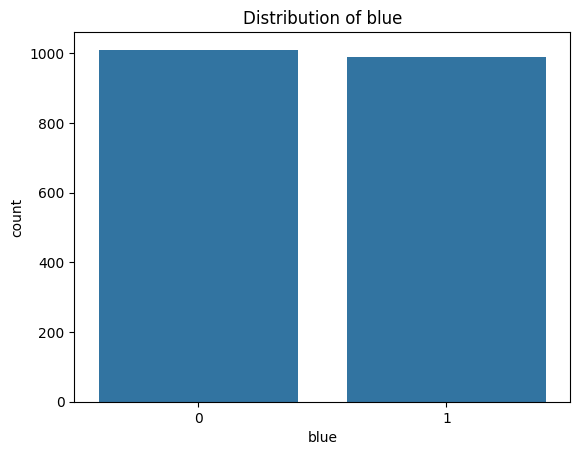

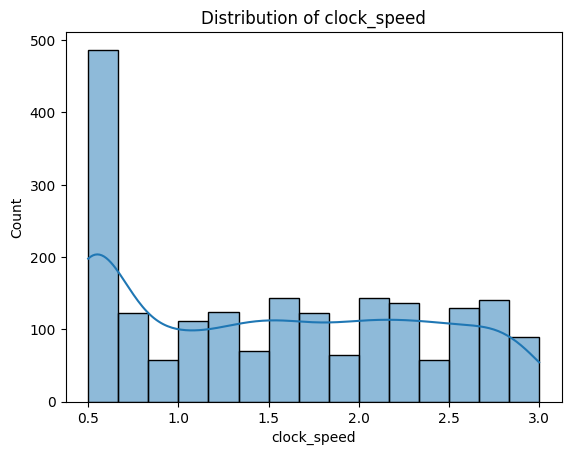

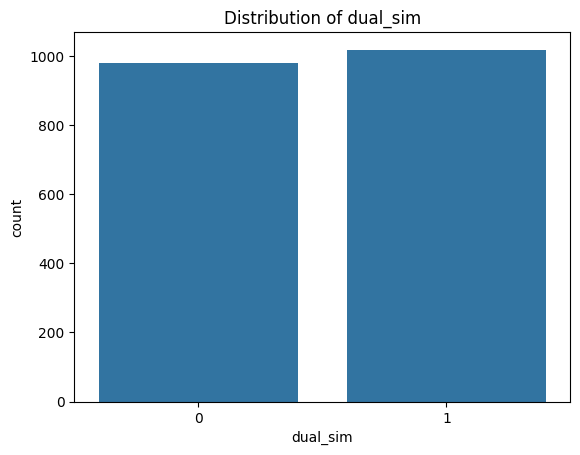

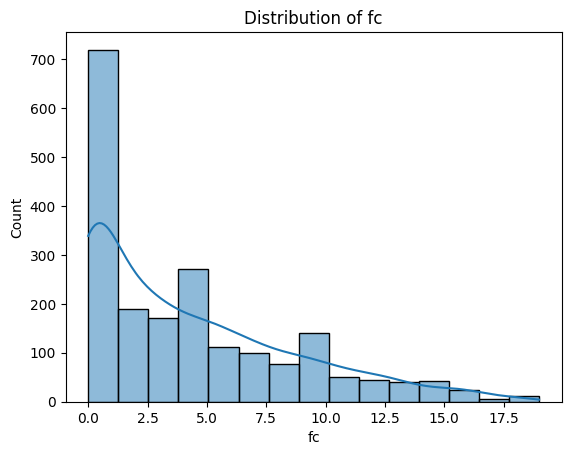

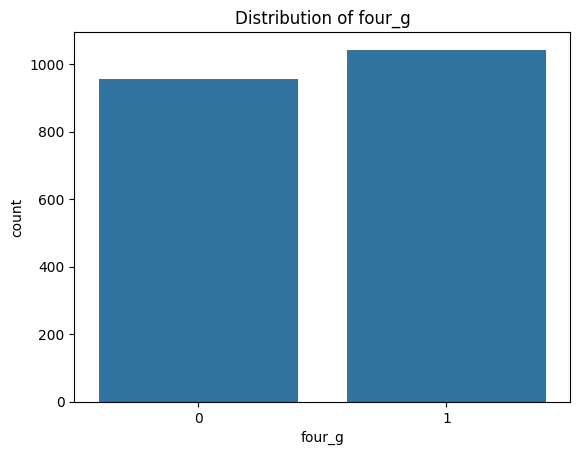

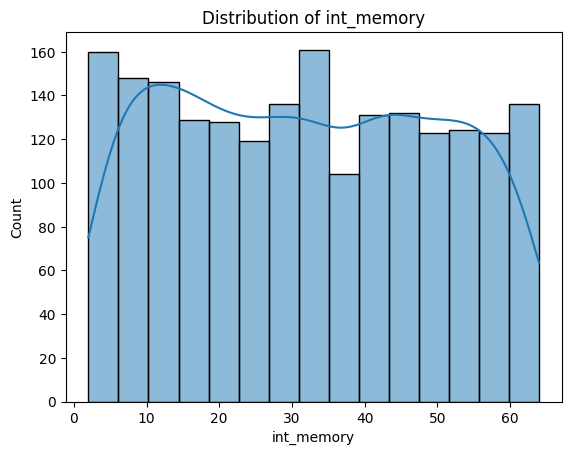

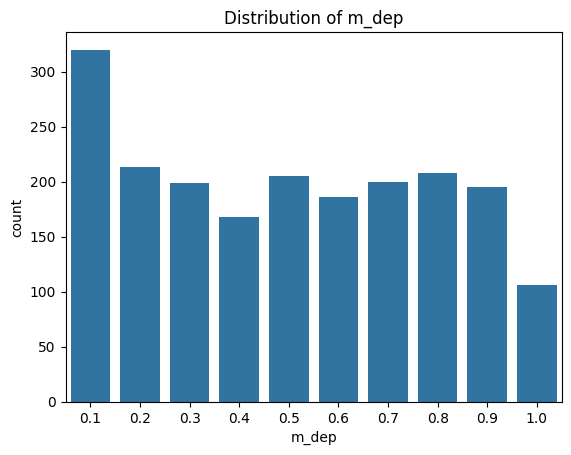

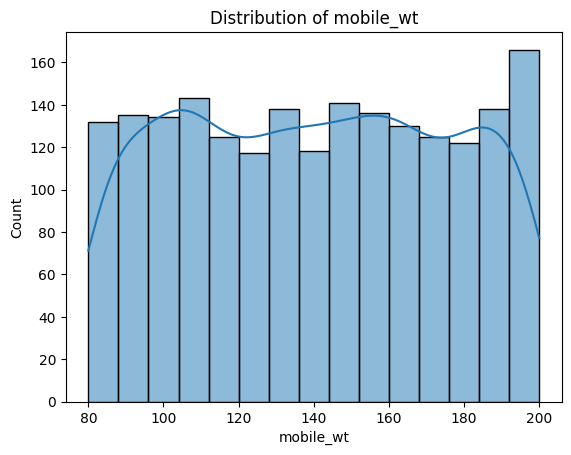

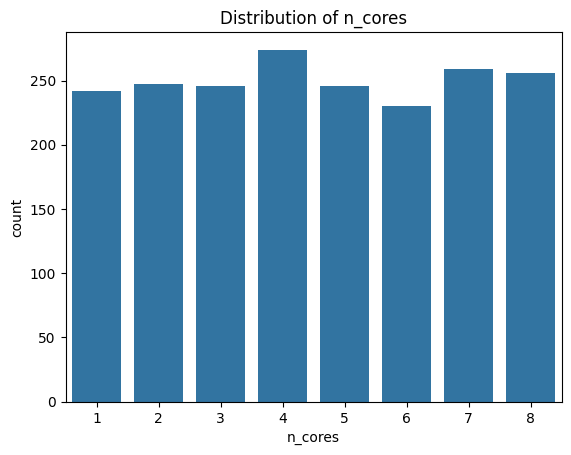

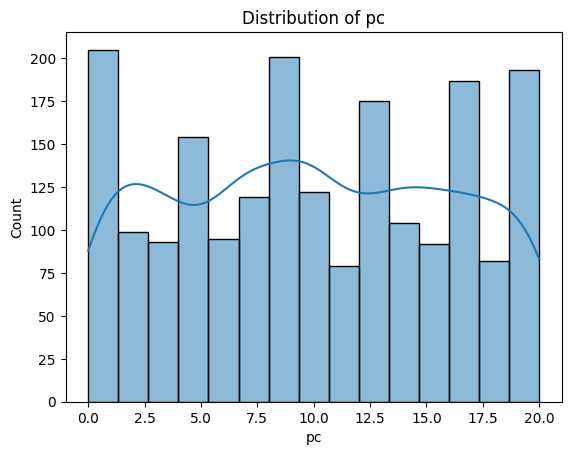

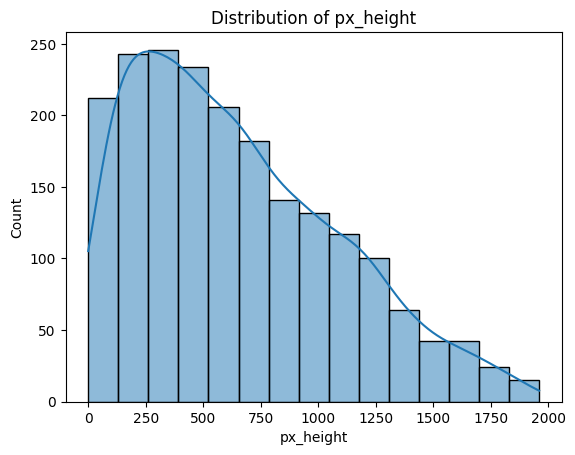

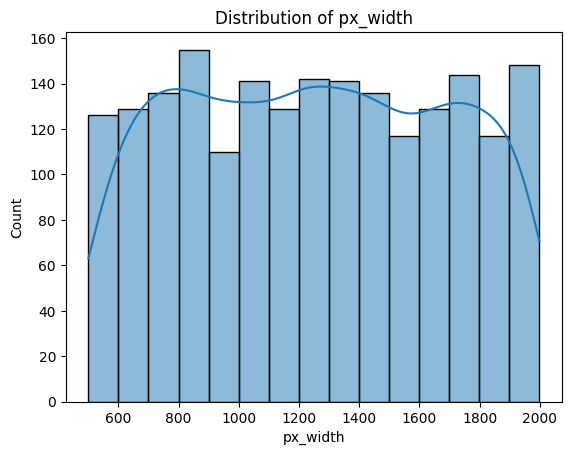

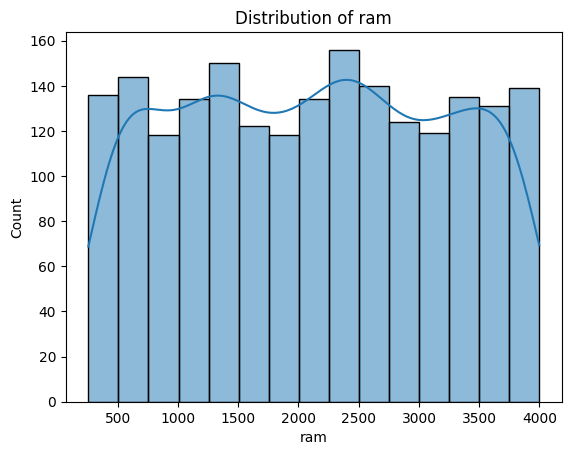

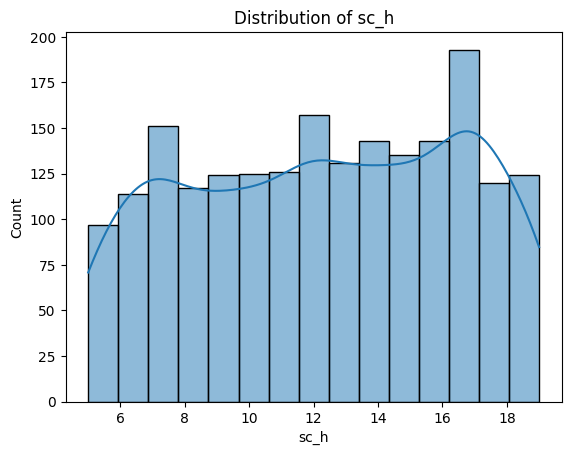

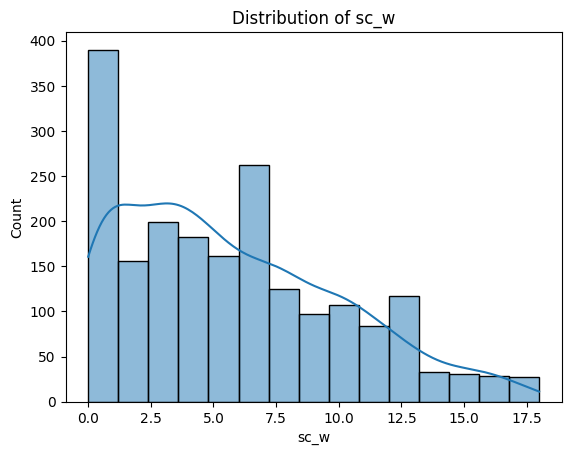

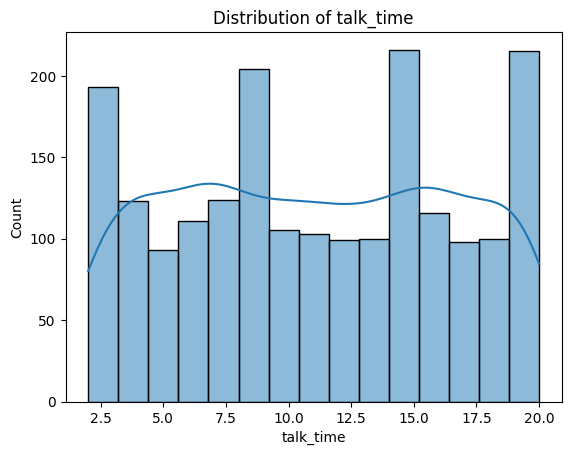

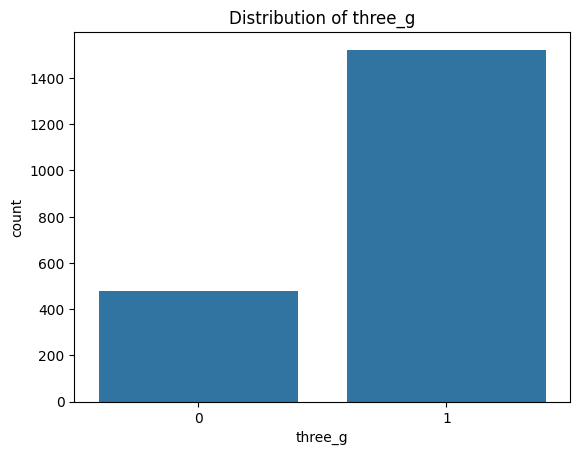

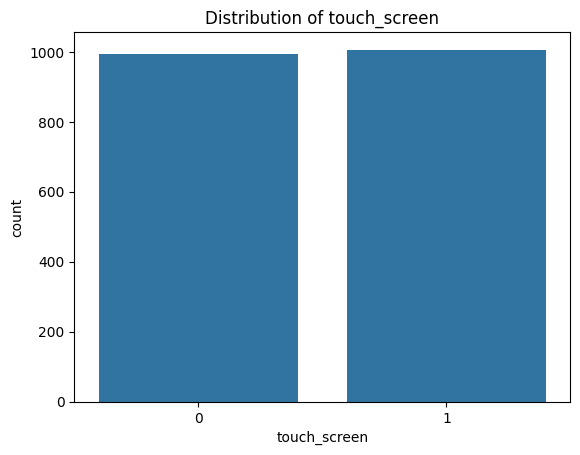

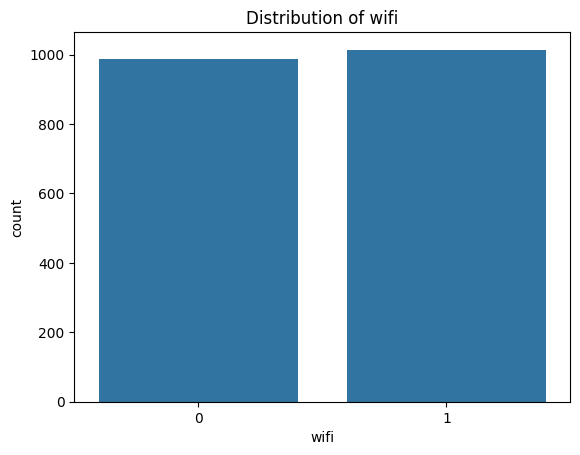

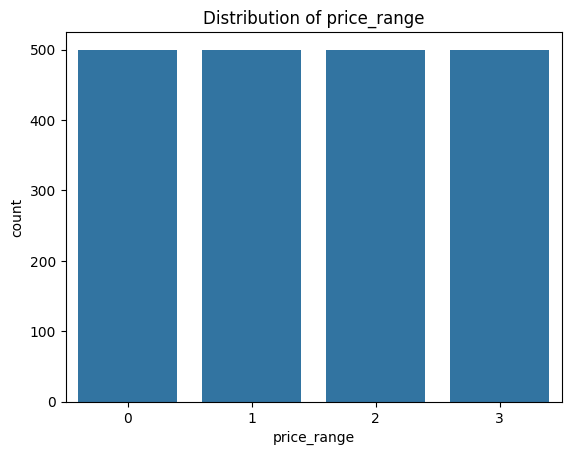

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in train.columns:
    if train[i].nunique() <= 10:
        plt.title(f'Distribution of {i}')
        sns.countplot(x = i, data = train)
        plt.show()
    else:
        plt.title(f'Distribution of {i}')
        sns.histplot(x = i , data = train , kde = True, bins = 15)
        plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
scale = train.drop(['price_range'],axis = 1 )
for i in scale.columns:
    train[i] = scaler.fit_transform(train[[i]])

In [7]:
from sklearn.model_selection import train_test_split
x = train.drop(['price_range'], axis = 1)
y = train['price_range']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [9]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred = rfc.predict(xtest)
print("accuracy : ", rfc.score(xtest,ytest))

print(classification_report(pred, ytest))

accuracy :  0.875
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.85      0.87      0.86        89
           2       0.84      0.76      0.80       101
           3       0.86      0.92      0.89       104

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



In [10]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print("accuracy : ", lr.score(xtest,ytest))

print(classification_report(pred, ytest))

accuracy :  0.9775
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.95      0.97        96
           2       0.95      0.99      0.97        88
           3       0.99      0.97      0.98       114

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

